<a href="https://colab.research.google.com/github/TiagoSpiandorello/Analise_de_portfolio_de_acoes/blob/main/analise_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
# Importação das bibliotecas necessárias para o projeto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from scipy.stats import norm
%matplotlib inline

In [96]:
# Extração dos dados de um portfólio de ações do site Yahoo

tickers = ['LOGN3.SA','VVAR3.SA','LOGG3.SA','MRFG3.SA','TRIS3.SA']
bolsas = pd.DataFrame()
for t in tickers:
    bolsas[t] = wb.DataReader(t, data_source='yahoo',start='2010-1-1')['Adj Close']

bolsas.tail(10)

,LOGN3.SA,VVAR3.SA,LOGG3.SA,MRFG3.SA,TRIS3.SA
Date,,,,,
2021-06-08,19.450001,15.29,31.620001,18.160000,10.75
2021-06-09,19.420000,15.08,32.279999,18.430000,10.57
2021-06-10,19.459999,14.56,32.320000,18.650000,10.58
2021-06-11,18.990000,14.60,31.690001,18.610001,10.34
2021-06-14,18.780001,14.80,31.709999,19.059999,10.55
2021-06-15,18.400000,14.76,31.260000,19.480000,10.41
2021-06-16,18.639999,14.68,30.719999,19.170000,10.36
2021-06-17,18.469999,15.06,30.969999,18.660000,10.26
2021-06-18,18.690001,15.02,32.799999,18.639999,10.53


# Taxa de retorno das ações

## taxa de retorno simples = (preço final - preço inicial) / preço inicial

## taxa de retorno logarítmica = log preço final / log preço inicial

In [97]:
# Cálculo da taxa de retorno logarítmica das ações

retorno = np.log(bolsas / bolsas.shift(1))
retorno

,LOGN3.SA,VVAR3.SA,LOGG3.SA,MRFG3.SA,TRIS3.SA
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.011976,-0.025400,NaN,0.069680,0.000000
2010-01-06,0.007117,-0.009944,NaN,0.026099,-0.025479
2010-01-07,-0.009501,0.002661,NaN,0.048009,0.022330
2010-01-08,0.020083,-0.000665,NaN,0.019890,0.006289
...,...,...,...,...,...
2021-06-15,-0.020442,-0.002706,-0.014293,0.021796,-0.013359
2021-06-16,0.012959,-0.005435,-0.017425,-0.016042,-0.004815
2021-06-17,-0.009162,0.025556,0.008105,-0.026964,-0.009699


In [98]:
retorno['LOGN3.SA'].mean()

-0.0002355207218311784

In [99]:
retorno['VVAR3.SA'].mean()

0.0005133813660468494

In [100]:
retorno['LOGG3.SA'].mean()

0.0010529680102757133

In [101]:
retorno['MRFG3.SA'].mean()

-4.429092747118286e-06

In [102]:
retorno['TRIS3.SA'].mean()

0.0005699889932366412

In [103]:
retorno['LOGN3.SA'].std()

0.0371067318662129

In [104]:
retorno['VVAR3.SA'].std()

0.04178837149851785

In [105]:
retorno['LOGG3.SA'].std()

0.03731005400093433

In [106]:
retorno['MRFG3.SA'].std()

0.03000438774212902

In [107]:
retorno['TRIS3.SA'].std()

0.031153598094838034

In [108]:
LOGN_var = retorno['LOGN3.SA'].var()
LOGN_var

0.0013769095497910197

In [109]:
VVAR_var = retorno['VVAR3.SA'].var()
VVAR_var

0.0017462679924981387

In [110]:
LOGG_var = retorno['LOGG3.SA'].var()
LOGG_var

0.001392040129552636

In [111]:
MRFG_var = retorno['MRFG3.SA'].var()
MRFG_var

0.000900263283780022

In [112]:
TRIS_var = retorno['TRIS3.SA'].var()
TRIS_var

0.0009705466742546961

## Covariância

cov > 0 => variáveis se movem na mesma direção

cov < 0 => variáveis se movem em direções opostas

cov = 0 => variáveis são independentes

In [113]:
cov_matrix = bolsas.cov()
cov_matrix

,LOGN3.SA,VVAR3.SA,LOGG3.SA,MRFG3.SA,TRIS3.SA
LOGN3.SA,190.982907,-2.219622,17.471065,23.179668,-4.828057
VVAR3.SA,-2.219622,13.907225,29.284552,4.757270,10.923714
LOGG3.SA,17.471065,29.284552,38.826781,20.369517,17.266245
MRFG3.SA,23.179668,4.757270,20.369517,18.947738,6.652413
TRIS3.SA,-4.828057,10.923714,17.266245,6.652413,13.514121


In [114]:
cov_matrix = retorno.cov()
cov_matrix

,LOGN3.SA,VVAR3.SA,LOGG3.SA,MRFG3.SA,TRIS3.SA
LOGN3.SA,0.001377,0.000293,0.000655,0.000196,0.000245
VVAR3.SA,0.000293,0.001746,0.000765,0.000184,0.000243
LOGG3.SA,0.000655,0.000765,0.001392,0.000449,0.000705
MRFG3.SA,0.000196,0.000184,0.000449,0.000900,0.000191
TRIS3.SA,0.000245,0.000243,0.000705,0.000191,0.000971


## Correlação

corr = 1 => correlação perfeita

corr > 0 => variáveis se movem na mesma direção

corr = -1 => correlação perfeitamente negativa

corr < 0 => variáveis se movem em direções opostas

corr = 0 => variáveis absolutamente independentes

In [115]:
corr_matrix = retorno.corr()
corr_matrix

,LOGN3.SA,VVAR3.SA,LOGG3.SA,MRFG3.SA,TRIS3.SA
LOGN3.SA,1.000000,0.189235,0.423503,0.176008,0.211954
VVAR3.SA,0.189235,1.000000,0.452305,0.146887,0.186449
LOGG3.SA,0.423503,0.452305,1.000000,0.343589,0.497061
MRFG3.SA,0.176008,0.146887,0.343589,1.000000,0.204030
TRIS3.SA,0.211954,0.186449,0.497061,0.204030,1.000000


<function matplotlib.pyplot.show>

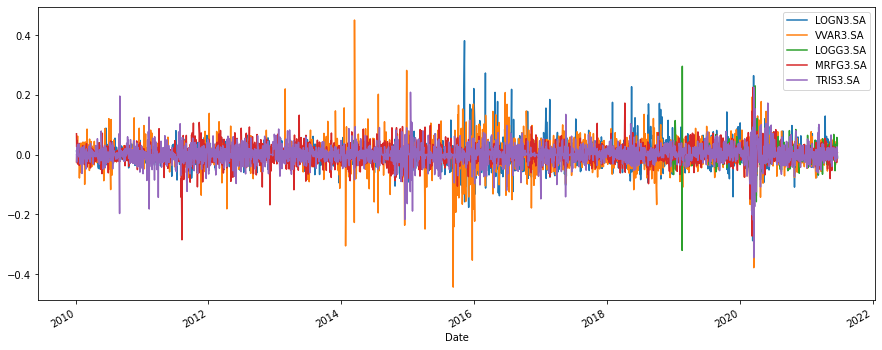

In [116]:
retorno.plot(figsize = (15, 6));
plt.show

In [117]:
corr_matrix = bolsas.corr()
corr_matrix

,LOGN3.SA,VVAR3.SA,LOGG3.SA,MRFG3.SA,TRIS3.SA
LOGN3.SA,1.000000,-0.043069,0.638876,0.385329,-0.095034
VVAR3.SA,-0.043069,1.000000,0.921539,0.293062,0.796813
LOGG3.SA,0.638876,0.921539,1.000000,0.798077,0.847009
MRFG3.SA,0.385329,0.293062,0.798077,1.000000,0.415725
TRIS3.SA,-0.095034,0.796813,0.847009,0.415725,1.000000


<function matplotlib.pyplot.show>

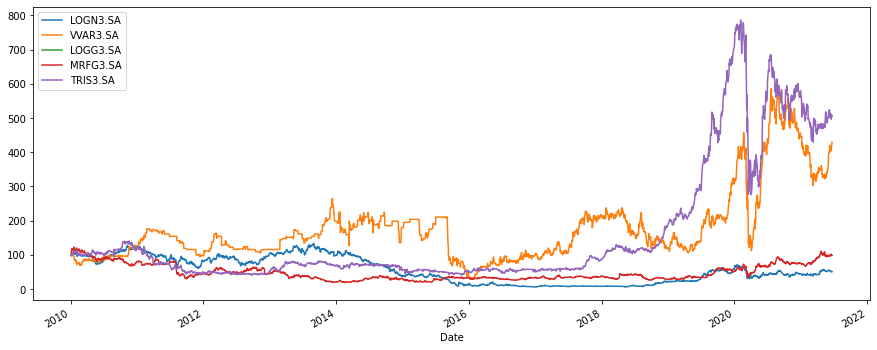

In [118]:
(bolsas / bolsas.iloc[0] * 100).plot(figsize = (15, 6));
plt.show

# Otimização de Portfólio de Markowitz

In [119]:
retorno.mean() * 250

LOGN3.SA   -0.058880
VVAR3.SA    0.128345
LOGG3.SA    0.263242
MRFG3.SA   -0.001107
TRIS3.SA    0.142497
dtype: float64

In [120]:
retorno.cov() * 250

,LOGN3.SA,VVAR3.SA,LOGG3.SA,MRFG3.SA,TRIS3.SA
LOGN3.SA,0.344227,0.073359,0.163803,0.048990,0.061255
VVAR3.SA,0.073359,0.436567,0.191146,0.046043,0.060682
LOGG3.SA,0.163803,0.191146,0.348010,0.112131,0.176184
MRFG3.SA,0.048990,0.046043,0.112131,0.225066,0.047679
TRIS3.SA,0.061255,0.060682,0.176184,0.047679,0.242637


In [121]:
retorno.corr()

,LOGN3.SA,VVAR3.SA,LOGG3.SA,MRFG3.SA,TRIS3.SA
LOGN3.SA,1.000000,0.189235,0.423503,0.176008,0.211954
VVAR3.SA,0.189235,1.000000,0.452305,0.146887,0.186449
LOGG3.SA,0.423503,0.452305,1.000000,0.343589,0.497061
MRFG3.SA,0.176008,0.146887,0.343589,1.000000,0.204030
TRIS3.SA,0.211954,0.186449,0.497061,0.204030,1.000000


In [122]:
num_tickers = len(tickers)
num_tickers

5

In [123]:
weights = np.random.random(num_tickers)
weights /= np.sum(weights)
weights

array([0.21890913, 0.00082258, 0.15422047, 0.48399487, 0.14205295])

In [124]:
weights[0] + weights[1] + weights[2] + weights[3] + weights[4]

1.0

# Retorno esperado do Portfólio

In [125]:
np.sum(weights * retorno.mean()) * 250

0.04751971136911448

# Variância esperada do Portfólio

In [126]:
np.dot(weights.T, np.dot(retorno.cov() *250, weights))

0.13878282294163008

# Volatilidade esperada do Portfólio

In [127]:
np.sqrt(np.dot(weights.T, np.dot(retorno.cov() *250, weights)))

0.37253566667049487

# 1.000 combinações diferentes dos mesmos ativos

In [128]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (10000):
    weights = np.random.random(num_tickers)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * retorno.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(retorno.cov() *250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.04341002, 0.14184751, 0.13328654, ..., 0.09795685, 0.09873186,
        0.0776471 ]),
 array([0.3625101 , 0.41082973, 0.42650398, ..., 0.39426337, 0.36741926,
        0.36331999]))

In [129]:
portfolios = pd.DataFrame({'Retorno': pfolio_returns, 'Volatilidade': pfolio_volatilities})
portfolios.head()

,Retorno,Volatilidade
0,0.043410,0.362510
1,0.141848,0.410830
2,0.133287,0.426504
3,0.071748,0.385466
4,0.140486,0.421871


Text(0, 0.5, 'Retorno esperado')

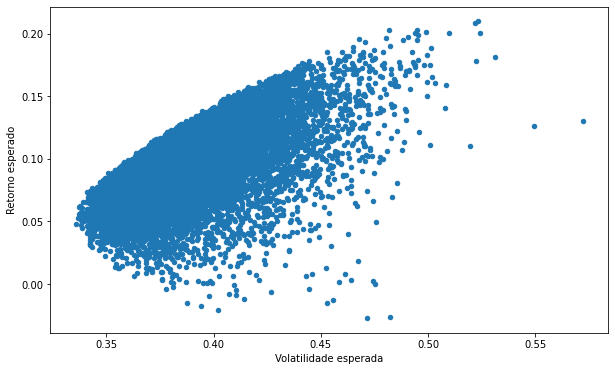

In [130]:
portfolios.plot(x='Volatilidade', y='Retorno', kind='scatter', figsize=(10,6))
plt.xlabel('Volatilidade esperada')
plt.ylabel('Retorno esperado')

<function matplotlib.pyplot.show>

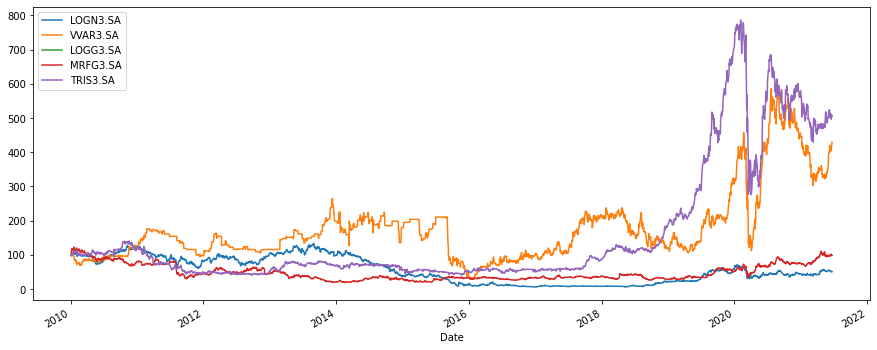

In [131]:
(bolsas / bolsas.iloc[0] * 100).plot(figsize = (15, 6));
plt.show

<function matplotlib.pyplot.show>

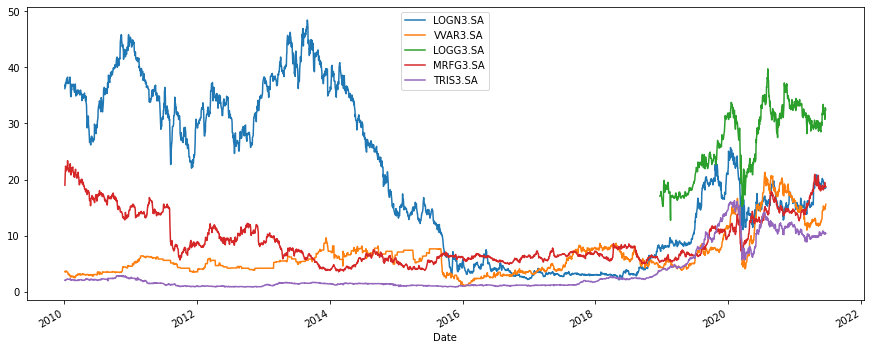

In [132]:
bolsas.plot(figsize = (15, 6));
plt.show

# CAPM

### Medindo o Beta
### Mede o risco de mercado que não pode ser evitado através da diversificação.
### Quanto mais volátil uma ação, maior seu beta. O beta varia entre -1 e 2.
### B = 0 nenhuma relação; B < 1 defensiva; B > 1 agressiva
### Ações defensivas perdem menos quando a economia está mal e ganham menos quando estão bem; agressivas são o oposto.

In [134]:
tickers = ['LOGN3.SA','VVAR3.SA','LOGG3.SA','MRFG3.SA','TRIS3.SA','^BVSP']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo',start='2015-1-1')['Adj Close']

In [135]:
sec_returns = np.log( data / data.shift(1))

In [136]:
cov = sec_returns.cov() * 250
cov

,LOGN3.SA,VVAR3.SA,LOGG3.SA,MRFG3.SA,TRIS3.SA,^BVSP
LOGN3.SA,0.512615,0.124948,0.163797,0.060777,0.091608,0.073057
VVAR3.SA,0.124948,0.553231,0.191129,0.077309,0.113097,0.084334
LOGG3.SA,0.163797,0.191129,0.348020,0.112129,0.176183,0.104398
MRFG3.SA,0.060777,0.077309,0.112129,0.218676,0.060950,0.060414
TRIS3.SA,0.091608,0.113097,0.176183,0.060950,0.262987,0.064365
^BVSP,0.073057,0.084334,0.104398,0.060414,0.064365,0.072848


In [137]:
# Covariação da primeira ação com o mercado.

cov_with_market = cov.iloc[0,5]
cov_with_market

0.0730568014924171

In [138]:
market_var = sec_returns['^BVSP'].var() * 250
market_var

0.07284846421168403

In [139]:
logn_beta = cov_with_market / market_var
logn_beta

1.002859871968305

In [140]:
# Covariação da seegunda ação com o mercado.

cov_with_market = cov.iloc[1,5]
cov_with_market

0.08433402392332835

In [141]:
market_var = sec_returns['^BVSP'].var() * 250
market_var

0.07284846421168403

In [142]:
vvar_beta = cov_with_market / market_var
vvar_beta

1.1576637179099538

# Modelo de Precificação de Ativos Financeiros (CAPM)

### Ação livre de risco = retorno de 2,5%.
### Beta
### Prêmio de risco das ações = entre 4,5% e 5,5%
### Retorno esperado para valer a pena investir na ação


In [143]:
logn_er = 0.025 + logn_beta * 0.05
logn_er

0.07514299359841525

In [144]:
vvar_beta = 0.025 + vvar_beta * 0.05
vvar_beta

0.0828831858954977

### Se o retorno ficar abaixo do calculado, não vale a pena investir nessa ação.

# Índice de Sharp
## Decidir o melhor portfólio em termos de risco e retorno

In [145]:
sharpe_logn = (logn_er - 0.025) / (sec_returns['LOGN3.SA'].std() * 250 ** 0.5)
sharpe_logn

0.07003490595575462

In [146]:
sharpe_vvar = (logn_er - 0.025) / (sec_returns['VVAR3.SA'].std() * 250 ** 0.5)
sharpe_vvar

0.06741507331164436

# Simulações de Monte Carlo
### Observar os possíveis diferentes resultados de um evento futuro
### 1 - Prever o preço da ação

In [147]:
log_returns_1 = np.log(1 + data['LOGN3.SA'].pct_change())

In [148]:
log_returns_1.tail()

Date
2021-06-15   -0.020442
2021-06-16    0.012959
2021-06-17   -0.009162
2021-06-18    0.011841
2021-06-21   -0.005903
Name: LOGN3.SA, dtype: float64

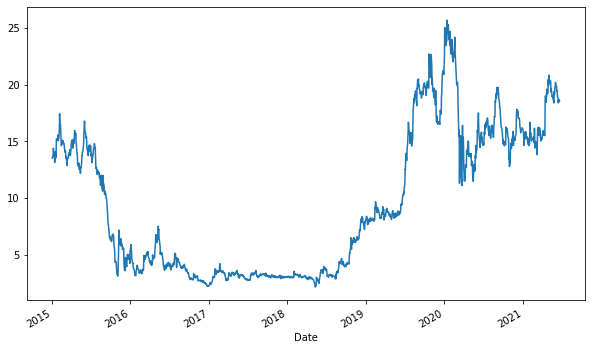

In [149]:
data['LOGN3.SA'].plot(figsize=(10,6))

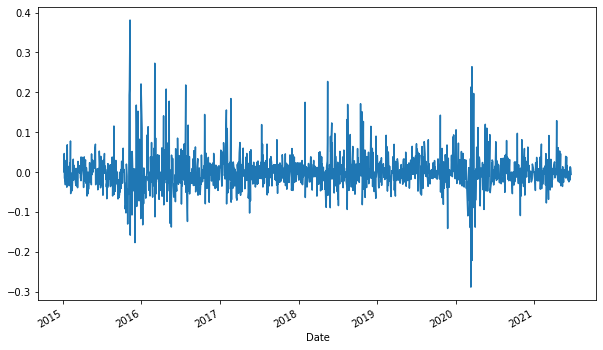

In [150]:
log_returns_1.plot(figsize=(10,6))

In [151]:
u = log_returns_1.mean()
u

0.00019866432146116978

In [152]:
var = log_returns_1.var()
var

0.0020504605040817326

In [153]:
drift = u - (0.5 * var)
drift

-0.0008265659305796964

In [154]:
stdev = log_returns_1.std()
stdev

0.045282010821978

In [155]:
type(drift)

float

In [156]:
type(stdev)

float

In [157]:
np.array(drift)

array(-0.00082657)

In [158]:
np.array(stdev)

array(0.04528201)

In [159]:
norm.ppf(0.95)

1.6448536269514722

In [160]:
x = np.random.rand(10,2)
x

array([[0.60464751, 0.36838004],
       [0.2839498 , 0.39573795],
       [0.61940737, 0.03138815],
       [0.8621595 , 0.75539433],
       [0.44527355, 0.14164615],
       [0.54949509, 0.39700854],
       [0.35955673, 0.27096383],
       [0.62241887, 0.43683101],
       [0.10197342, 0.54207147],
       [0.20048355, 0.65110999]])

In [161]:
norm.ppf(x)

array([[ 0.26539528, -0.33614691],
       [-0.57114759, -0.26439457],
       [ 0.30392471, -1.86077263],
       [ 1.09007299,  0.69156375],
       [-0.13761197, -1.07295277],
       [ 0.12438579, -0.26109782],
       [-0.35964388, -0.6099006 ],
       [ 0.31183983, -0.1590087 ],
       [-1.27038692,  0.10565376],
       [-0.83989529,  0.38831895]])

In [162]:
z = norm.ppf(np.random.rand(10,2))
z

array([[-3.13716119, -0.35331688],
       [-1.90368926, -0.68488249],
       [-0.84315796,  1.03333591],
       [-0.37487555, -0.49132261],
       [-0.29475534, -0.43693453],
       [-0.76966922, -0.61652136],
       [-1.90565057,  0.3639218 ],
       [-0.92287163, -2.73570769],
       [-0.60475959,  0.94315018],
       [-0.25658348, -0.9497369 ]])

In [163]:
t_intervals = 100
iterations = 10

In [164]:
daily_returns = np.exp(np.array(drift) + np.array(stdev) * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.03268137, 0.97419349, 0.96007587, 0.9635236 , 1.04065555,
        0.97564827, 1.06765309, 0.97139365, 0.97393136, 0.92282542],
       [1.02782057, 1.05113021, 0.96431765, 0.92918259, 1.00735106,
        0.87329841, 1.02584741, 0.9628266 , 0.9915164 , 1.01308658],
       [0.92859264, 1.02168767, 1.02906307, 0.94229574, 0.99245579,
        1.04846602, 0.99515425, 1.01402853, 0.97527732, 1.04095182],
       [0.97453623, 0.96168806, 0.95875356, 1.01358804, 0.98193498,
        1.00517342, 1.00503422, 0.99210776, 1.06910576, 0.9879564 ],
       [1.04946876, 1.00502672, 1.04200973, 0.91031256, 1.06193624,
        1.04228684, 0.98001302, 1.0701463 , 0.98686831, 1.05222012],
       [1.00671918, 1.03738902, 1.00874984, 0.99282328, 0.98760724,
        0.99682339, 0.94247963, 1.04079038, 0.97693615, 0.9847987 ],
       [1.04312605, 0.99076013, 0.98854187, 1.00537243, 1.01772455,
        0.96290076, 1.03337513, 0.89053499, 0.9633322 , 1.00853574],
       [0.97675932, 1.03007583, 1.0038785

In [165]:
s0 = data['LOGN3.SA'].iloc[-1]
s0

18.579999923706055

In [166]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [167]:
price_list[0] = s0
price_list

array([[18.57999992, 18.57999992, 18.57999992, 18.57999992, 18.57999992,
        18.57999992, 18.57999992, 18.57999992, 18.57999992, 18.57999992],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

In [168]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [169]:
price_list

array([[18.57999992, 18.57999992, 18.57999992, 18.57999992, 18.57999992,
        18.57999992, 18.57999992, 18.57999992, 18.57999992, 18.57999992],
       [19.09690616, 19.52999914, 17.91702189, 17.2642124 , 18.71658262,
        16.22588446, 19.06024487, 17.88931822, 18.42237457, 18.82314849],
       [17.73324658, 19.95355923, 18.43774562, 16.26799378, 18.57538071,
        17.01228846, 18.96788362, 18.14027913, 17.96692411, 19.59399066],
       [17.28169128, 19.18909962, 17.67725416, 16.48904389, 18.23981606,
        17.10030017, 19.06337214, 17.99711171, 19.20854205, 19.35800846],
       [18.13659508, 19.28555793, 18.4198709 , 15.01018375, 19.36952174,
        17.82341786, 18.68235291, 19.25954252, 18.95630148, 20.36888593],
       [18.25845814, 20.00662602, 18.58104182, 14.90245989, 19.12947994,
        17.76679983, 17.60773704, 20.04514657, 18.51909614, 20.05925235],
       [19.04587336, 19.82176734, 18.36813786, 14.98252228, 19.46854141,
        17.10766514, 18.19539759, 17.85090443

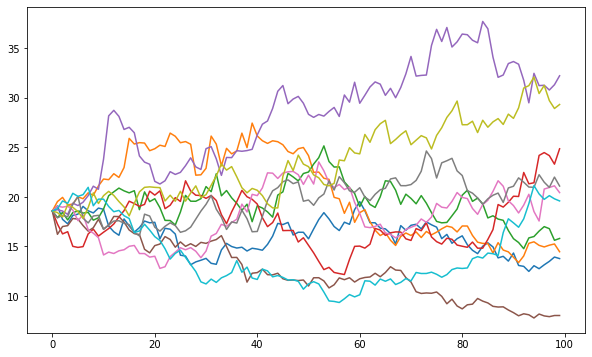

In [170]:
plt.figure(figsize=(10,6))
plt.plot(price_list)